In [ ]:
'''

Final 100% Code

'''

In [1]:
# imports
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import plotly.express as px
import warnings
from sklearn.metrics.pairwise import cosine_similarity
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
# url extraction
urls = ['https://www.carwow.co.uk/suzuki', 'https://www.carwow.co.uk/toyota','https://www.carwow.co.uk/honda', 'https://www.carwow.co.uk/hyundai', 'https://www.carwow.co.uk/mazda', 'https://www.carwow.co.uk/mitsubishi', 'https://www.carwow.co.uk/nissan', 'https://www.carwow.co.uk/lexus', 'https://www.carwow.co.uk/abarth', 'https://www.carwow.co.uk/alfa-romeo', 'https://www.carwow.co.uk/alpine', 'https://www.carwow.co.uk/audi', 'https://www.carwow.co.uk/bmw', 'https://www.carwow.co.uk/byd', 'https://www.carwow.co.uk/citroen', 'https://www.carwow.co.uk/cupra', 'https://www.carwow.co.uk/dacia', 'https://www.carwow.co.uk/ds', 'https://www.carwow.co.uk/fiat', 'https://www.carwow.co.uk/ford', 'https://www.carwow.co.uk/ineos', 'https://www.carwow.co.uk/jaguar', 'https://www.carwow.co.uk/jeep', 'https://www.carwow.co.uk/kgm-motors', 'https://www.carwow.co.uk/kia', 'https://www.carwow.co.uk/land-rover', 'https://www.carwow.co.uk/lotus', 'https://www.carwow.co.uk/mazda', 'https://www.carwow.co.uk/mercedes', 'https://www.carwow.co.uk/mg', 'https://www.carwow.co.uk/mini', 'https://www.carwow.co.uk/ora', 'https://www.carwow.co.uk/peugeot', 'https://www.carwow.co.uk/polestar', 'https://www.carwow.co.uk/renault', 'https://www.carwow.co.uk/seat', 'https://www.carwow.co.uk/skoda', 'https://www.carwow.co.uk/smart', 'https://www.carwow.co.uk/subaru', 'https://www.carwow.co.uk/tesla', 'https://www.carwow.co.uk/vauxhall', 'https://www.carwow.co.uk/Volkswagen', 'https://www.carwow.co.uk/volvo']

In [ ]:
def correction(data):
  newdata=''
  count=0
  for i in data:
    if count==1:
       if i==' ':
          newdata+='-'
       else:
          newdata+=i
    elif i==' ':
       count=1;
  return newdata

In [3]:
import csv

In [ ]:
fieldnames = ['car_name',	'brand',	'model',	'vehicle_age',	'km_driven',	'seller_type',	'fuel_type',	'transmission_type',	'mileage',	'engine'	,'max_power',	'seats'	,'selling_price']

In [ ]:
with open('6.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for url in urls:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        cars = soup.find_all('div', {'class': 'card-generic__title'})

        for car in cars:
            car_name = car.text.strip()
            model = correction(car_name)
            newurl = f"{url}/{model}"

            r1 = requests.get(newurl)
            soup1 = BeautifulSoup(r1.text, 'html.parser')

            # Extract engine data
            engine_element = soup1.find('div', {'class': 'summary-list__item'})
            engine = engine_element.find('dd').text.strip() if engine_element else 'N/A'

            # Extract selling price data
            price_element = soup1.find('div', {'class': 'price'})
            selling_price = price_element.text.strip() if price_element else 'N/A'

            # Extract transmission type and fuel type
            t1 = soup1.find_all('div', {'class': 'review-overview__most-popular-content-facts-group-fact'})
            if t1:
                k1 = [h1.text.strip() for h1 in t1]
                brand = k1[-2].split(' ')[0]
                fuel_type = k1[-2].split(' ')[-1]
                transmission_type = k1[-1]
            else:
                brand = 'N/A'
                fuel_type = 'N/A'
                transmission_type = 'N/A'

            # Extract specifications data
            newurl1 = f"{url}/{model}/specifications"
            r2 = requests.get(newurl1)
            soup2 = BeautifulSoup(r2.text, 'html.parser')
            T1 = soup2.find_all('div', {'class': 'summary-list__item'})
            l2 = [l1.dd.text.strip() for l1 in T1]
            vehicle_age = l2[0] if len(l2) > 0 else 'N/A'
            km_driven = l2[1] if len(l2) > 1 else 'N/A'
            seller_type = 'Dealer' if 'Dealer' in url else 'Individual'
            mileage = l2[2] if len(l2) > 2 else 'N/A'
            max_power = l2[3] if len(l2) > 3 else 'N/A'
            seats = l2[4] if len(l2) > 4 else 'N/A'

            # Write data to CSV
            writer.writerow({
                'car_name': car_name,
                'brand': brand,
                'model': model,
                'vehicle_age': vehicle_age,
                'km_driven': km_driven,
                'seller_type': seller_type,
                'fuel_type': fuel_type,
                'transmission_type': transmission_type,
                'mileage': mileage,
                'engine': engine,
                'max_power': max_power,
                'seats': seats,
                'selling_price': selling_price
            })

In [4]:
df = pd.read_csv('6.csv')
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Suzuki Alto,Suzuki,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Suzuki Alto,Suzuki,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
df = df.iloc[:, 1:]
df = df.drop('seller_type', axis=1)
df.head()

,car_name,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Suzuki Alto,Suzuki,Alto,9,120000,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Petrol,Manual,17.00,1197,80.00,5,215000
3,Suzuki Alto,Suzuki,Alto,9,37000,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Diesel,Manual,22.77,1498,98.59,5,570000


In [6]:
# Numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 5 categorical features : ['car_name', 'brand', 'model', 'fuel_type', 'transmission_type']


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   fuel_type          15411 non-null  object 
 6   transmission_type  15411 non-null  object 
 7   mileage            15411 non-null  float64
 8   engine             15411 non-null  int64  
 9   max_power          15411 non-null  float64
 10  seats              15411 non-null  int64  
 11  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.4+ MB


(15411, 12)

In [ ]:
df.dtypes

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [7]:
#Missing Values
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
car_name,0,0.0
brand,0,0.0
model,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0
engine,0,0.0
max_power,0,0.0


In [8]:
df = df.drop_duplicates()
df.dropna()

,car_name,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Suzuki Alto,Suzuki,Alto,9,120000,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Petrol,Manual,17.00,1197,80.00,5,215000
3,Suzuki Alto,Suzuki,Alto,9,37000,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Suzuki Ertiga,Suzuki,Ertiga,2,18000,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Diesel,Manual,16.00,2179,140.00,7,1225000


In [9]:
df.duplicated().value_counts()

False    15229
Name: count, dtype: int64

In [ ]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'fuel_type',
       'transmission_type', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')

In [ ]:
print(df["brand"].value_counts())

brand
Suzuki           4930
Hyundai          2946
Honda            1475
Mahindra          998
Toyota            789
Ford              775
Volkswagen        614
Renault           524
BMW               436
Tata              421
Skoda             333
Mercedes-Benz     332
Audi              190
Datsun            170
Jaguar             58
Land Rover         50
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus               9
Isuzu               7
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64


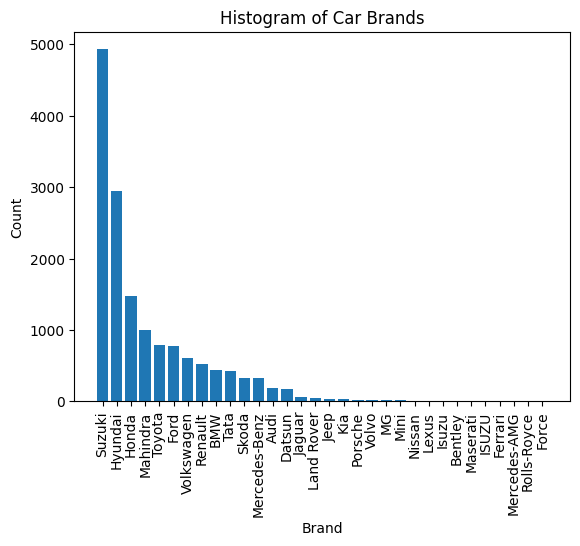

In [ ]:
# Histograms (categorical)
brand_counts = df['brand'].value_counts()
plt.bar(brand_counts.index, brand_counts.values)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Histogram of Car Brands')
plt.xticks(rotation=90)
plt.show()

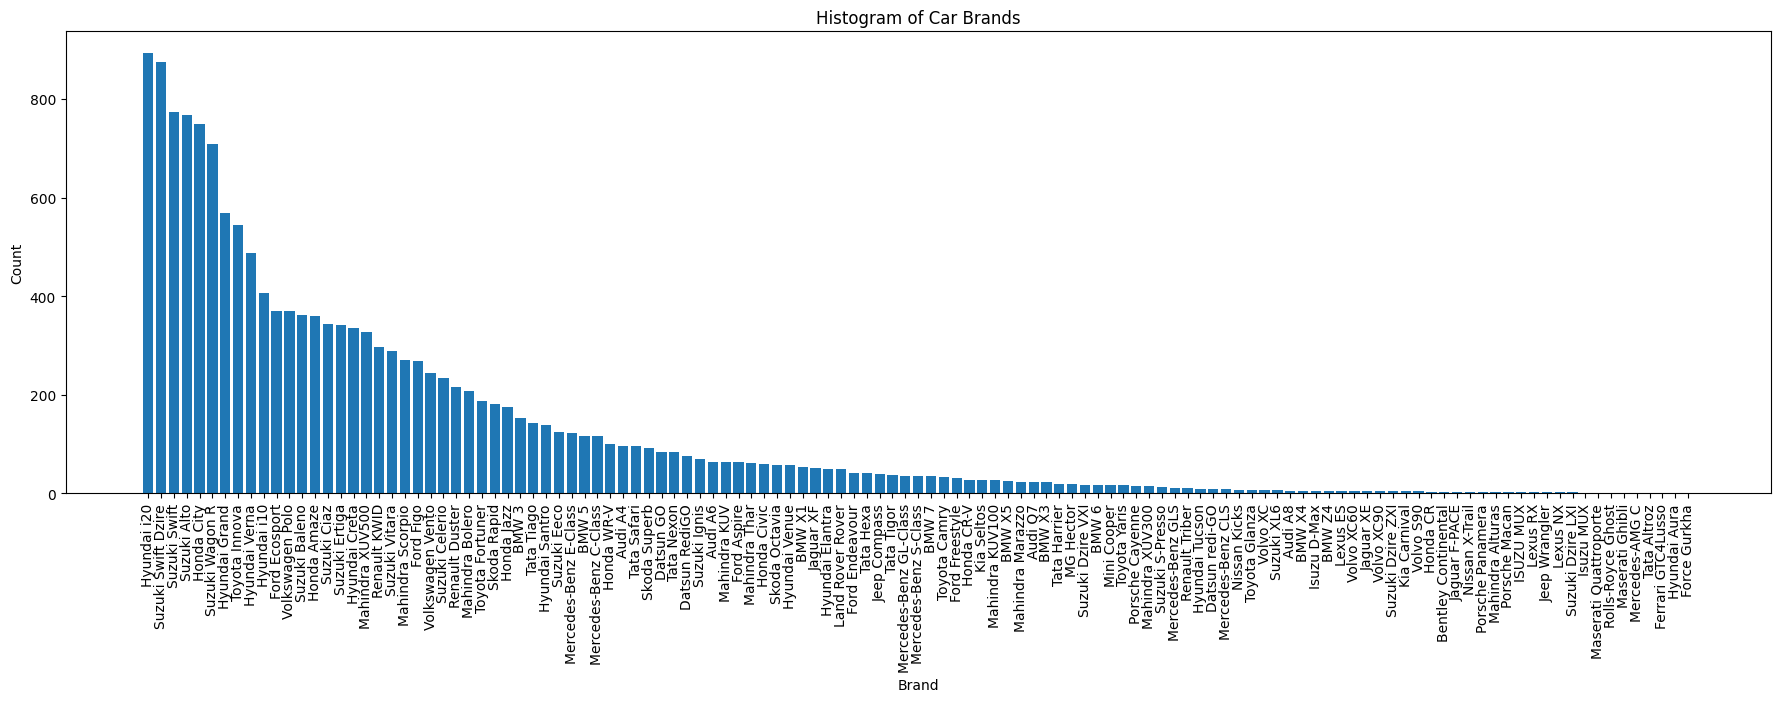

In [ ]:
fig, ax = plt.subplots(figsize=(22, 6))

brand_counts = df['car_name'].value_counts()
ax.bar(brand_counts.index, brand_counts.values)
ax.set_xlabel('Brand')
ax.set_ylabel('Count')
ax.set_title('Histogram of Car Brands')
ax.set_xticks(brand_counts.index)
ax.tick_params(axis='x', rotation=90)

plt.show()

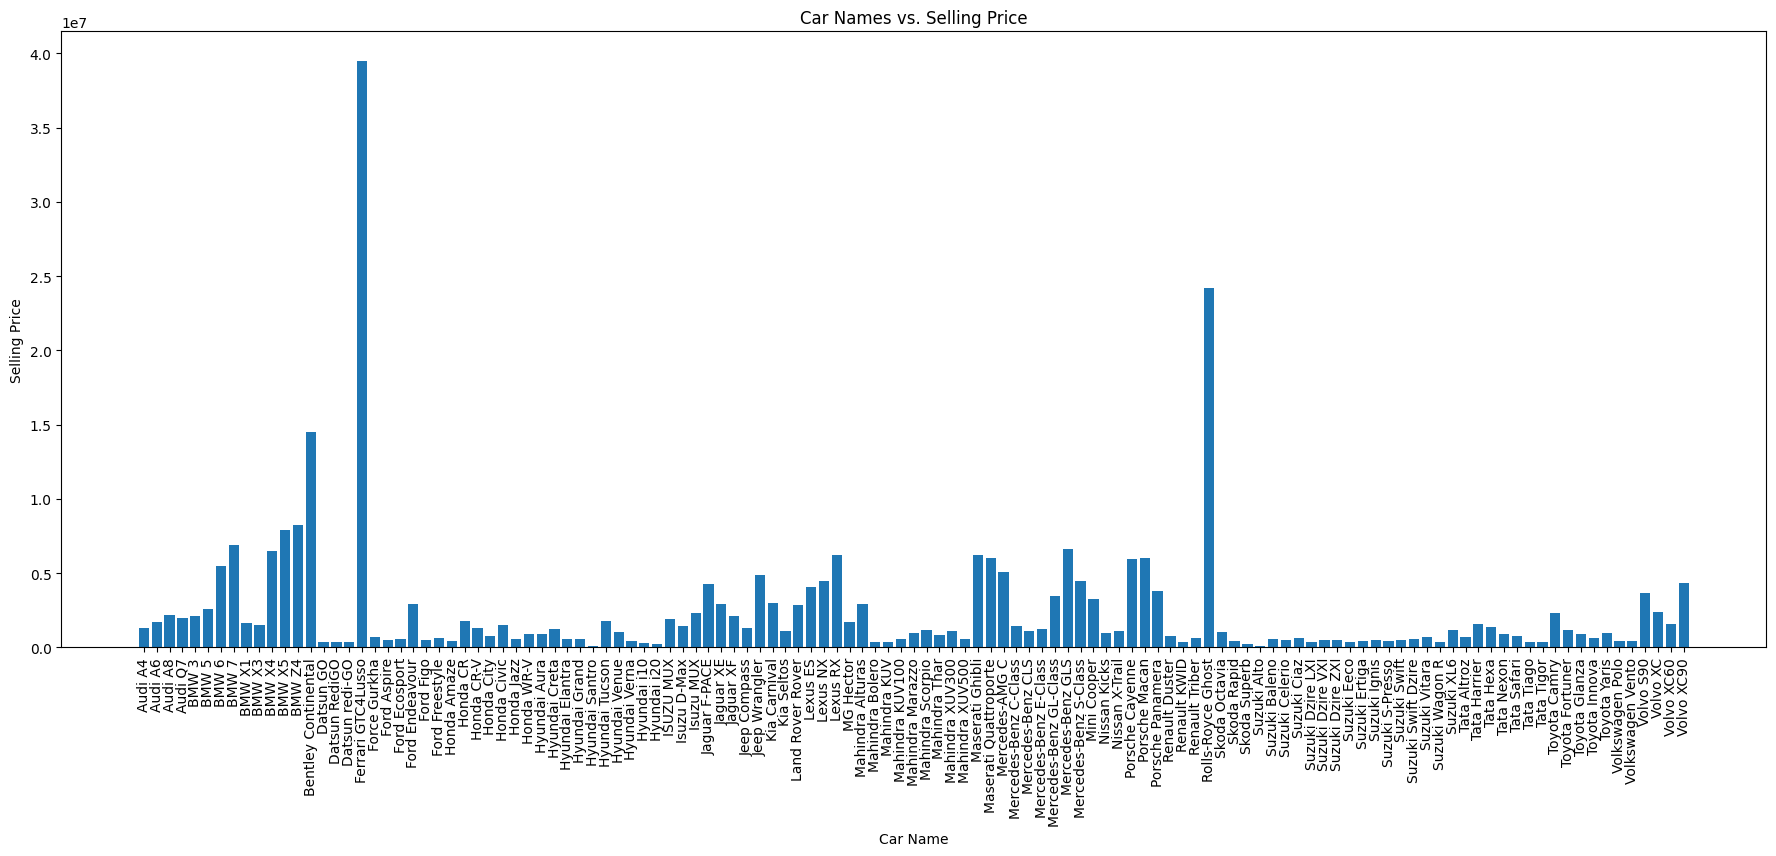

In [ ]:
# Better readability
sorted_car_names = sorted(df['car_name'].unique())
car_prices = []
for car_name in sorted_car_names:
    car_prices.append(df[df['car_name'] == car_name]['selling_price'].values[0])
# Create the bar chart
fig, ax = plt.subplots(figsize=(22, 8))
ax.bar(sorted_car_names, car_prices)
ax.set_xlabel('Car Name')
ax.set_ylabel('Selling Price')
ax.set_title('Car Names vs. Selling Price')
ax.tick_params(axis='x', rotation=90)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['car_name', 'brand', 'model', 'fuel_type', 'transmission_type']

# Create a dictionary to store the label encoder objects
label_encoders = {}

# Loop through the categorical columns and fit label encoder to each column
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    # Store the label encoder object in the dictionary
    label_encoders[col] = le

df.head()


,car_name,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,87,27,7,9,120000,4,1,19.70,796,46.30,5,120000
1,34,8,54,5,20000,4,1,18.90,1197,82.00,5,550000
2,40,8,118,11,60000,4,1,17.00,1197,80.00,5,215000
3,87,27,7,9,37000,4,1,20.92,998,67.10,5,226000
4,20,6,38,6,30000,1,1,22.77,1498,98.59,5,570000


In [ ]:
df.describe()

,car_name,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
count,15229.000000,15229.000000,15229.000000,15229.000000,1.522900e+04,15229.000000,15229.000000,15229.000000,15229.000000,15229.000000,15229.000000,1.522900e+04
mean,66.591503,18.064088,62.190951,6.042747,5.565607e+04,2.472520,0.793223,19.696304,1486.382166,100.628221,5.326351,7.748968e+05
std,34.164595,9.892864,36.323227,3.016908,5.178570e+04,1.523689,0.405007,4.170305,520.485342,42.928678,0.808984,8.950669e+05
min,0.000000,0.000000,0.000000,0.000000,1.000000e+02,0.000000,0.000000,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,34.000000,8.000000,26.000000,4.000000,3.000000e+04,1.000000,1.000000,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,80.000000,24.000000,62.000000,6.000000,5.000000e+04,1.000000,1.000000,19.670000,1248.000000,88.500000,5.000000,5.590000e+05
75%,98.000000,27.000000,92.000000,8.000000,7.000000e+04,4.000000,1.000000,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,120.000000,31.000000,119.000000,29.000000,3.800000e+06,4.000000,1.000000,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [ ]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 15229 entries, 0 to 15410
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15229 non-null  int64  
 1   brand              15229 non-null  int64  
 2   model              15229 non-null  int64  
 3   vehicle_age        15229 non-null  int64  
 4   km_driven          15229 non-null  int64  
 5   fuel_type          15229 non-null  int64  
 6   transmission_type  15229 non-null  int64  
 7   mileage            15229 non-null  float64
 8   engine             15229 non-null  int64  
 9   max_power          15229 non-null  float64
 10  seats              15229 non-null  int64  
 11  selling_price      15229 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 1.5 MB


,car_name,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,87,27,7,9,120000,4,1,19.70,796,46.30,5,120000
1,34,8,54,5,20000,4,1,18.90,1197,82.00,5,550000
2,40,8,118,11,60000,4,1,17.00,1197,80.00,5,215000
3,87,27,7,9,37000,4,1,20.92,998,67.10,5,226000
4,20,6,38,6,30000,1,1,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...
15406,39,8,117,9,10723,4,1,19.81,1086,68.05,5,250000
15407,95,27,42,2,18000,4,1,17.50,1373,91.10,7,925000
15408,85,26,77,6,67000,1,1,21.14,1498,103.52,5,425000
15409,64,17,114,5,3800000,1,1,16.00,2179,140.00,7,1225000


In [ ]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

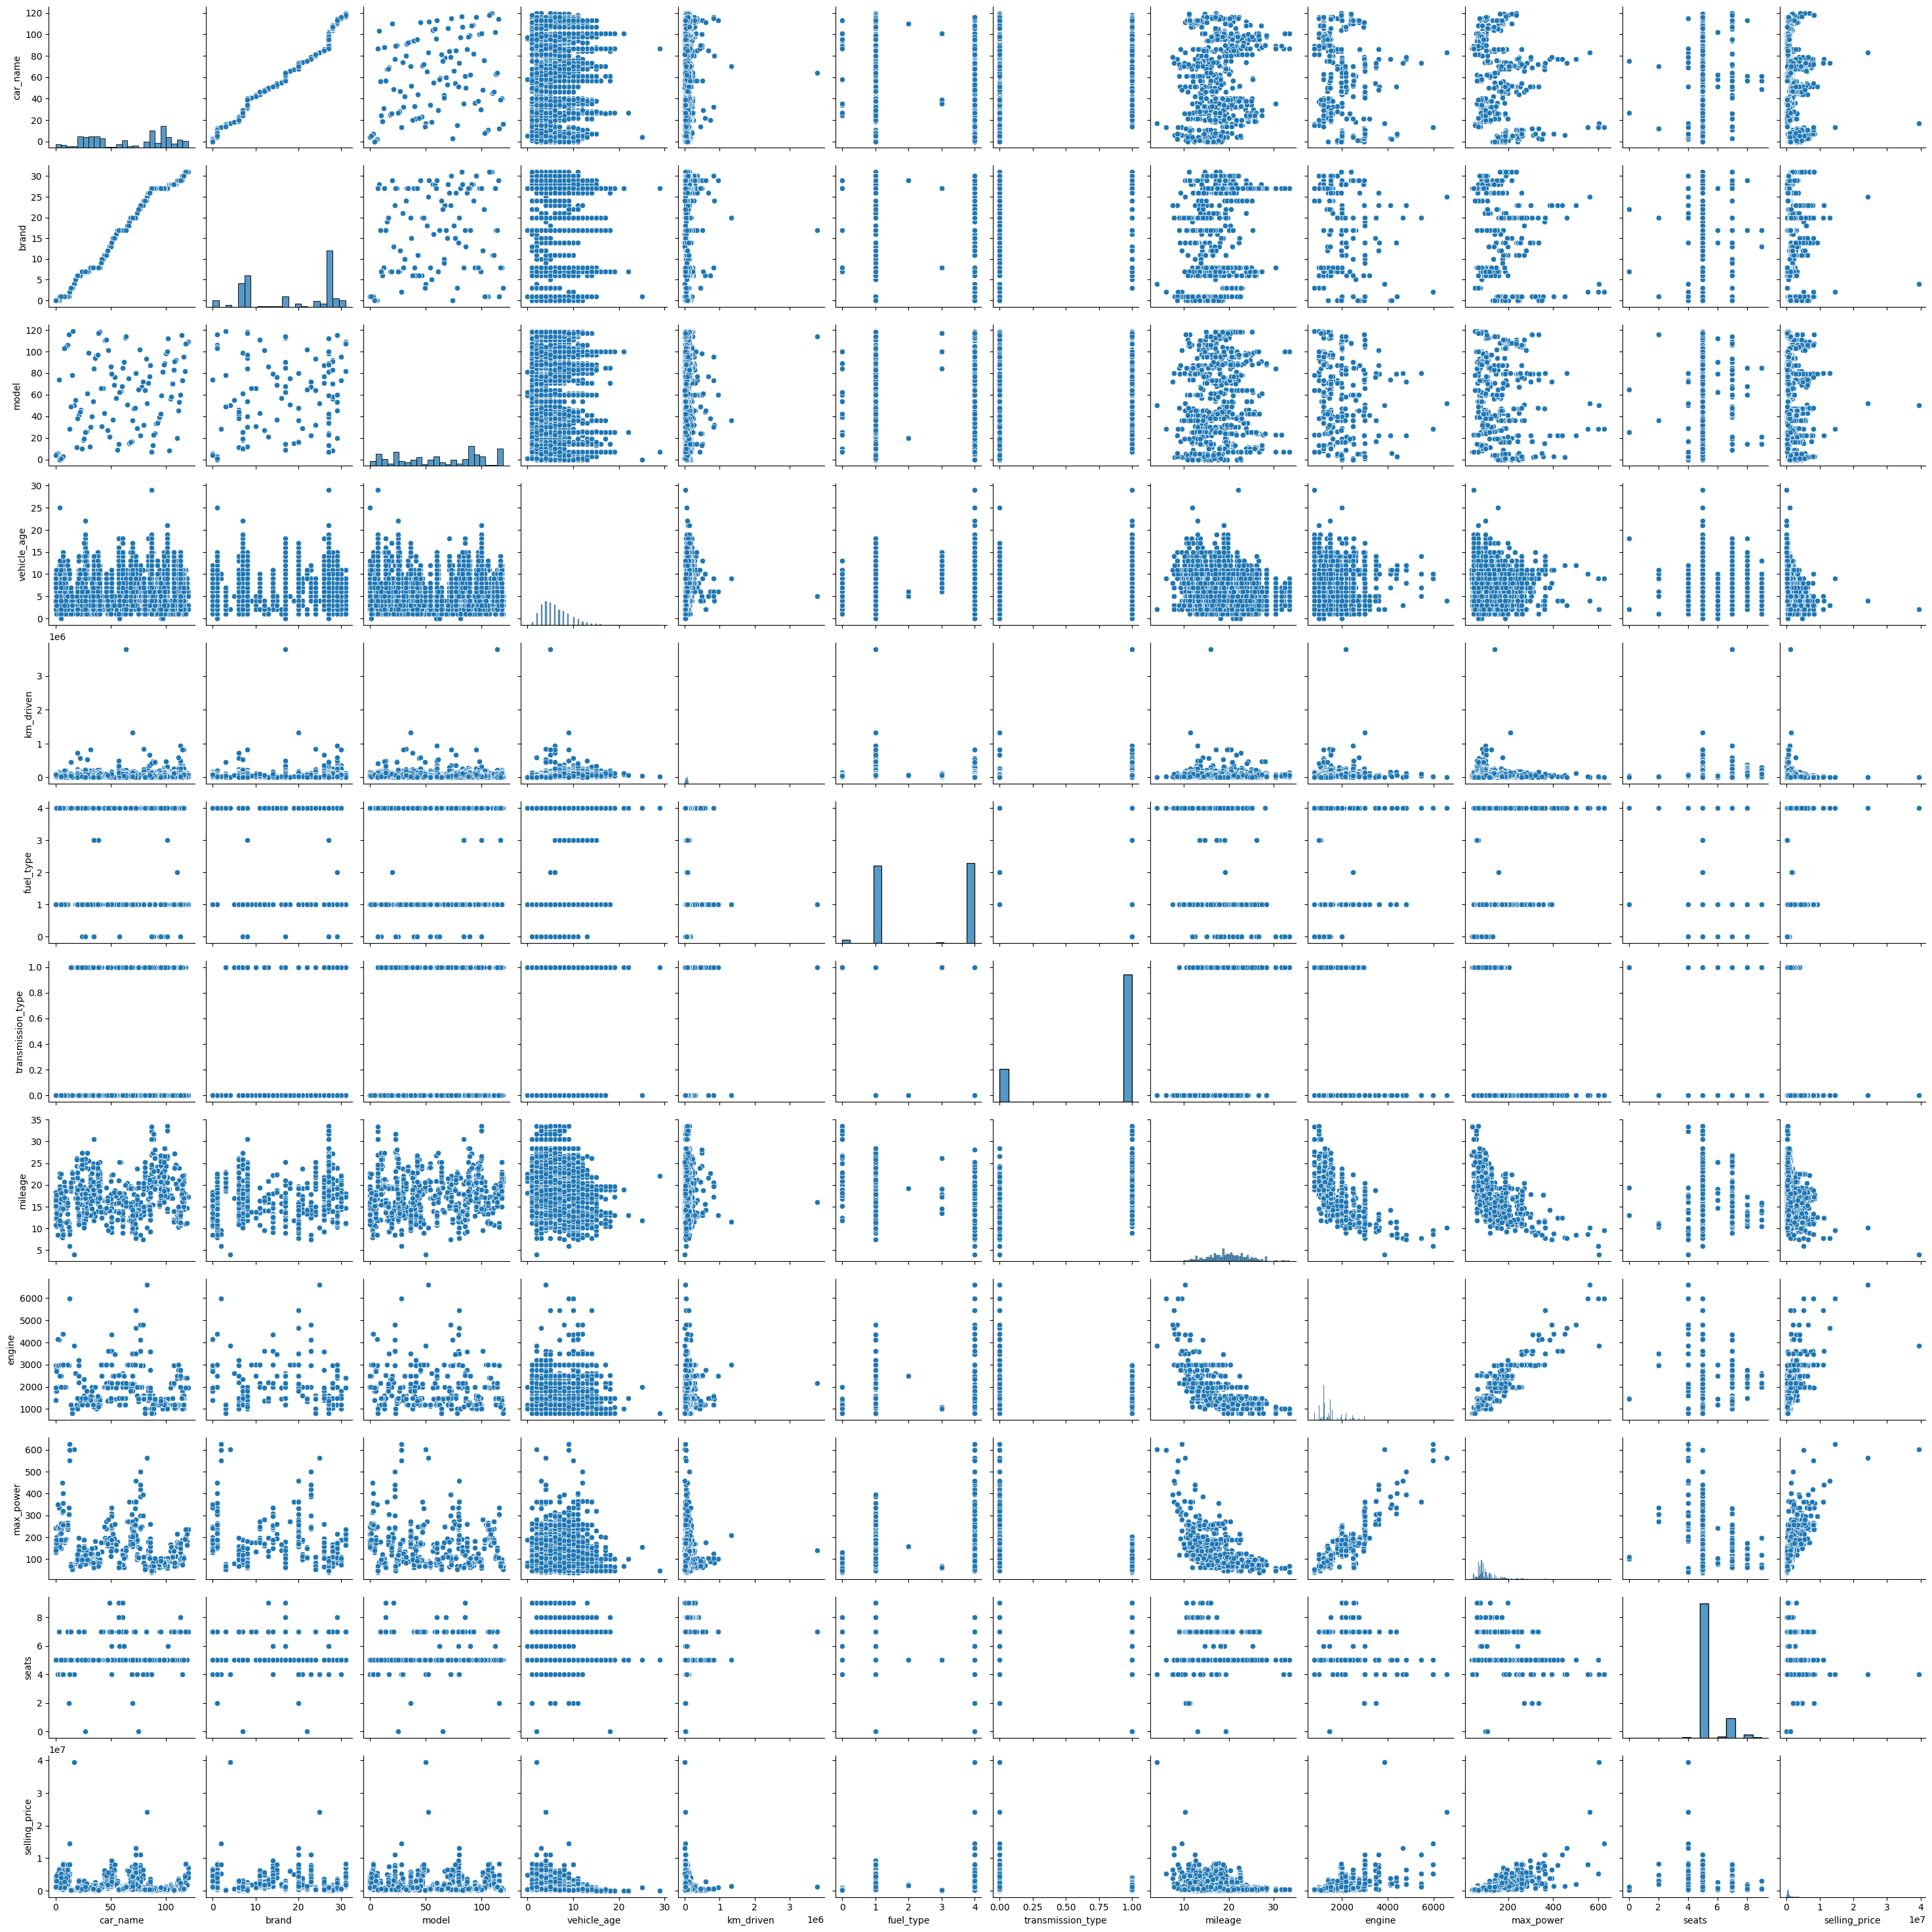

In [ ]:
sns.pairplot(df)

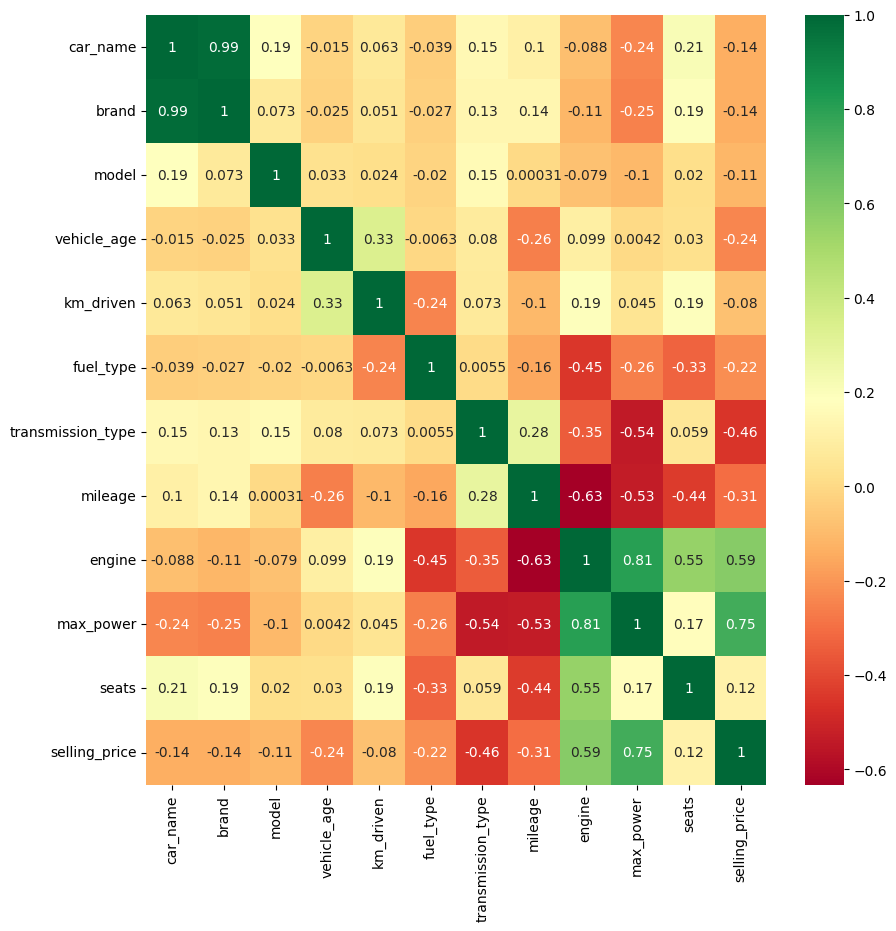

In [ ]:
corrmat = df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
# plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from sklearn.model_selection import train_test_split
X=df
y= df['car_name']

In [ ]:
X

,car_name,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,87,27,7,9,120000,4,1,19.70,796,46.30,5,120000
1,34,8,54,5,20000,4,1,18.90,1197,82.00,5,550000
2,40,8,118,11,60000,4,1,17.00,1197,80.00,5,215000
3,87,27,7,9,37000,4,1,20.92,998,67.10,5,226000
4,20,6,38,6,30000,1,1,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...
15406,39,8,117,9,10723,4,1,19.81,1086,68.05,5,250000
15407,95,27,42,2,18000,4,1,17.50,1373,91.10,7,925000
15408,85,26,77,6,67000,1,1,21.14,1498,103.52,5,425000
15409,64,17,114,5,3800000,1,1,16.00,2179,140.00,7,1225000


In [ ]:
y

0        87
1        34
2        40
3        87
4        20
         ..
15406    39
15407    95
15408    85
15409    64
15410    27
Name: car_name, Length: 15229, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

(12183, 12)

In [ ]:
# Models Evaluation
from sklearn import tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_regressor = lr_model.fit(X_train, y_train)
lr_pred = lr_regressor.predict(X_test)
evs_lr = explained_variance_score(y_true=y_test, y_pred=lr_pred)
r_square_score_lr = r2_score(y_true=y_test, y_pred=lr_pred)

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_regressor = dt_model.fit(X_train, y_train)
dt_pred = dt_regressor.predict(X_test)
evs_dt = explained_variance_score(y_true=y_test, y_pred=dt_pred)
r_square_score_dt = r2_score(y_true=y_test, y_pred=dt_pred)

# Random Forest
rf_model = ensemble.RandomForestRegressor()
rf_regressor = rf_model.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)
evs_rf = explained_variance_score(y_true=y_test, y_pred=rf_pred)
r_square_score_rf = r2_score(y_true=y_test, y_pred=rf_pred)

# Gradient Boosting
gb_model = ensemble.GradientBoostingRegressor()
gb_regressor = gb_model.fit(X_train, y_train)
gb_pred = gb_regressor.predict(X_test)
evs_gb = explained_variance_score(y_true=y_test, y_pred=gb_pred)
r_square_score_gb = r2_score(y_true=y_test, y_pred=gb_pred)

# Create a DataFrame to store the results
ML_df = pd.DataFrame({
    "Model": ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    "Explained Variance Score": [evs_lr, evs_dt, evs_rf, evs_gb],
    "R-Square Score(Accuracy)": [r_square_score_lr, r_square_score_dt, r_square_score_rf, r_square_score_gb],
})

# Set the index to "Model"
ML_df.set_index('Model', inplace=True)

# Print the results in markdown format
print(ML_df.to_markdown())


| Model             |   Explained Variance Score |   R-Square Score(Accuracy) |
|:------------------|---------------------------:|---------------------------:|
| Linear Regression |                   1        |                   1        |
| Decision Tree     |                   0.999999 |                   0.999999 |
| Random Forest     |                   0.999999 |                   0.999999 |
| Gradient Boosting |                   0.999997 |                   0.999997 |


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse_lr = mean_squared_error(y_true=y_test, y_pred=pred)
rmse_lr = np.sqrt(mse_lr)
ML_df = pd.DataFrame({
    "Model": ['Linear Regression'],
    "Mean Squared Error": [mse_lr],
    "Root Mean Squared Error": [rmse_lr],
})

ML_df.set_index('Model', inplace=True)
print(ML_df.to_markdown())

| Model             |   Mean Squared Error |   Root Mean Squared Error |
|:------------------|---------------------:|--------------------------:|
| Linear Regression |          5.96545e-25 |               7.72363e-13 |


In [ ]:
d1=X_train.shape[0]
d2=df['car_name'].value_counts().size
print("total training samples : ",d1)
print("Total Car names : ",d2)


total training samples :  12183
Total Car names :  121


In [11]:
X = df.drop(['car_name'], axis=1).values
y = df['car_name'].values

In [12]:
#ANN training
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer with number of classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/100
191/191 [==============================] - 4s 11ms/step - loss: 3.6890 - accuracy: 0.1564 - val_loss: 2.7577 - val_accuracy: 0.3106
Epoch 2/100
191/191 [==============================] - 1s 3ms/step - loss: 2.3587 - accuracy: 0.3453 - val_loss: 1.8548 - val_accuracy: 0.4869
Epoch 3/100
191/191 [==============================] - 1s 4ms/step - loss: 1.8133 - accuracy: 0.4462 - val_loss: 1.4748 - val_accuracy: 0.5466
Epoch 4/100
191/191 [==============================] - 1s 4ms/step - loss: 1.5427 - accuracy: 0.5087 - val_loss: 1.2440 - val_accuracy: 0.6287
Epoch 5/100
191/191 [==============================] - 1s 4ms/step - loss: 1.3608 - accuracy: 0.5614 - val_loss: 1.0719 - val_accuracy: 0.7124
Epoch 6/100
191/191 [==============================] - 1s 4ms/step - loss: 1.2212 - accuracy: 0.6019 - val_loss: 0.9350 - val_accuracy: 0.7269
Epoch 7/100
191/191 [==============================] - 1s 3ms/step - loss: 1.1319 - accuracy: 0.6186 - val_loss: 0.8496 - val_accuracy: 0.780

In [16]:
# Evaluate the model ANN
scores = model.evaluate(X_test, y_test)
print("Accuracy of ANN: ")
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

96/96 [==============================] - 0s 1ms/step - loss: 0.2596 - accuracy: 0.9127
Accuracy of ANN: 
accuracy: 91.27%


In [14]:
# Evaluate the model
loss, mse = model.evaluate(X_test, y_test)
print("Model Loss: {:.4f}".format(loss))
print("MSE: {:.2f}".format(mse))

96/96 [==============================] - 0s 2ms/step - loss: 0.2596 - accuracy: 0.9127
Model Loss: 0.2596
MSE: 0.91


Epoch 1/20
191/191 [==============================] - 1s 4ms/step - loss: 0.2718 - accuracy: 0.8912 - val_loss: 0.2660 - val_accuracy: 0.9002
Epoch 2/20
191/191 [==============================] - 1s 3ms/step - loss: 0.2753 - accuracy: 0.8876 - val_loss: 0.2425 - val_accuracy: 0.9297
Epoch 3/20
191/191 [==============================] - 1s 3ms/step - loss: 0.2587 - accuracy: 0.8965 - val_loss: 0.2382 - val_accuracy: 0.9232
Epoch 4/20
191/191 [==============================] - 1s 3ms/step - loss: 0.2676 - accuracy: 0.8944 - val_loss: 0.2353 - val_accuracy: 0.9274
Epoch 5/20
191/191 [==============================] - 1s 3ms/step - loss: 0.2715 - accuracy: 0.8907 - val_loss: 0.2399 - val_accuracy: 0.9179
Epoch 6/20
191/191 [==============================] - 1s 3ms/step - loss: 0.2631 - accuracy: 0.8940 - val_loss: 0.2380 - val_accuracy: 0.9294
Epoch 7/20
191/191 [==============================] - 1s 4ms/step - loss: 0.2648 - accuracy: 0.8938 - val_loss: 0.2434 - val_accuracy: 0.9163
Epoch 

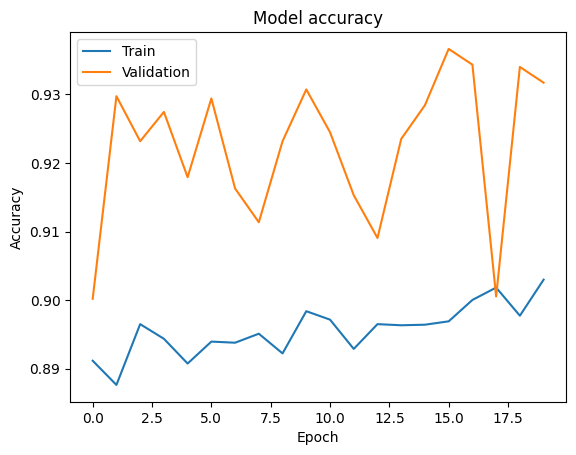

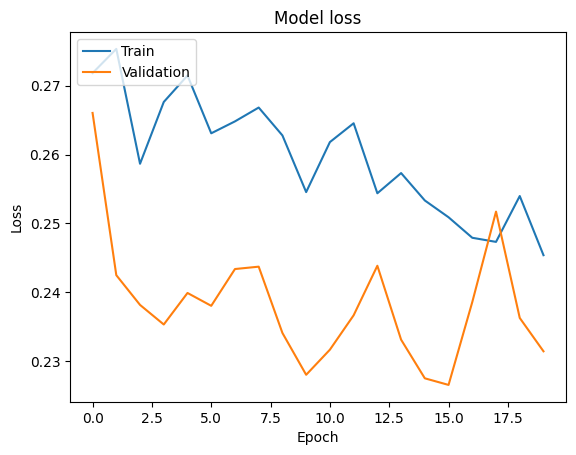

In [ ]:
import matplotlib.pyplot as plt

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [15]:
# RNN training
from tensorflow.keras.layers import LSTM

# Define the model architecture
model_rnn = Sequential()
model_rnn.add(LSTM(128, input_shape=(X_train.shape[1], 1), activation='relu'))  # LSTM layer with 128 units
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer with number of classes

# Compile the model
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Reshape input data for LSTM
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Reshape input to be [samples, time steps, features]
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model with early stopping
model_rnn.fit(X_train_rnn, y_train, epochs=100, batch_size=64, validation_data=(X_test_rnn, y_test), callbacks=[early_stopping])


Epoch 1/100
191/191 [==============================] - 7s 23ms/step - loss: 3.9352 - accuracy: 0.0542 - val_loss: 3.6928 - val_accuracy: 0.0768
Epoch 2/100
191/191 [==============================] - 4s 22ms/step - loss: 3.2952 - accuracy: 0.1561 - val_loss: 2.8027 - val_accuracy: 0.1878
Epoch 3/100
191/191 [==============================] - 5s 28ms/step - loss: 2.5702 - accuracy: 0.2411 - val_loss: 2.2374 - val_accuracy: 0.3276
Epoch 4/100
191/191 [==============================] - 4s 23ms/step - loss: 2.0435 - accuracy: 0.3564 - val_loss: 1.8151 - val_accuracy: 0.4563
Epoch 5/100
191/191 [==============================] - 5s 27ms/step - loss: 1.7472 - accuracy: 0.4391 - val_loss: 1.7811 - val_accuracy: 0.4255
Epoch 6/100
191/191 [==============================] - 6s 32ms/step - loss: 1.5783 - accuracy: 0.4862 - val_loss: 1.4999 - val_accuracy: 0.5223
Epoch 7/100
191/191 [==============================] - 4s 23ms/step - loss: 1.4221 - accuracy: 0.5194 - val_loss: 1.4022 - val_accuracy:

In [17]:
# Evaluate the model RNN
scores = model_rnn.evaluate(X_test_rnn, y_test)
print("\nAccuracy of RNN:")
print("%s: %.2f%%" % (model_rnn.metrics_names[1], scores[1]*100))

96/96 [==============================] - 1s 7ms/step - loss: 0.5175 - accuracy: 0.8043

Accuracy of RNN:
accuracy: 80.43%


In [18]:
# Evaluate the model RNN
loss = model.evaluate(X_test, y_test)[0]
mse = model.evaluate(X_test, y_test)[1]
print("RNN Model Loss: {:.4f}".format(loss))
print("MSE: {:.2f}".format(mse))

96/96 [==============================] - 0s 3ms/step - loss: 0.2596 - accuracy: 0.9127
RNN Model Loss: 0.2596
MSE: 0.91


Epoch 1/20
191/191 [==============================] - 5s 24ms/step - loss: 0.5975 - accuracy: 0.7666 - val_loss: 0.7075 - val_accuracy: 0.7318
Epoch 2/20
191/191 [==============================] - 5s 28ms/step - loss: 0.5660 - accuracy: 0.7817 - val_loss: 1.1973 - val_accuracy: 0.6320
Epoch 3/20
191/191 [==============================] - 4s 22ms/step - loss: 0.5288 - accuracy: 0.7968 - val_loss: 0.4788 - val_accuracy: 0.8073
Epoch 4/20
191/191 [==============================] - 5s 27ms/step - loss: 0.4897 - accuracy: 0.7983 - val_loss: 0.5346 - val_accuracy: 0.7948
Epoch 5/20
191/191 [==============================] - 5s 24ms/step - loss: 0.4822 - accuracy: 0.8073 - val_loss: 0.9776 - val_accuracy: 0.6198
Epoch 6/20
191/191 [==============================] - 4s 22ms/step - loss: 0.6102 - accuracy: 0.7801 - val_loss: 0.4443 - val_accuracy: 0.8230
Epoch 7/20
191/191 [==============================] - 6s 29ms/step - loss: 0.4219 - accuracy: 0.8258 - val_loss: 0.4556 - val_accuracy: 0.8365

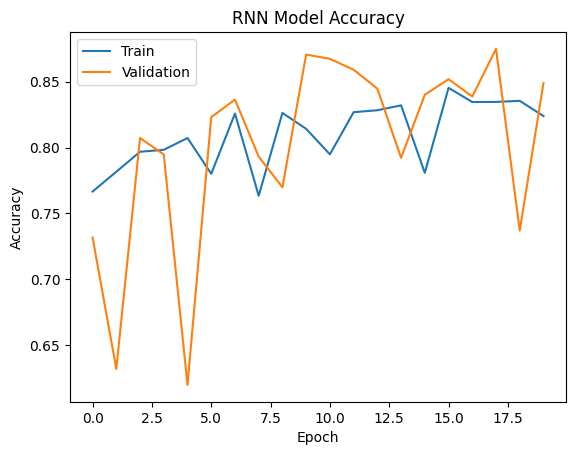

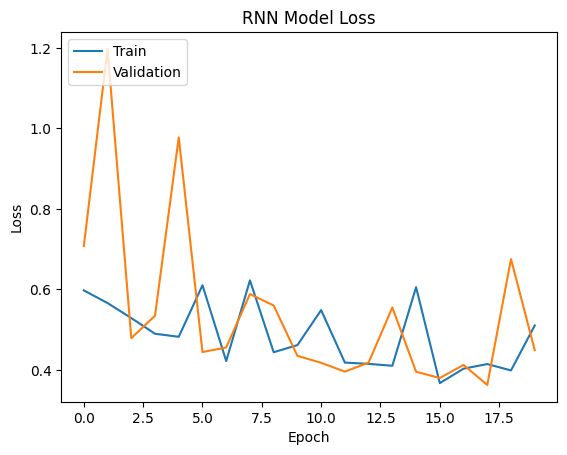

In [19]:
import matplotlib.pyplot as plt

# Train the model with early stopping
history_rnn = model_rnn.fit(X_train_rnn, y_train, epochs=20, batch_size=64, validation_data=(X_test_rnn, y_test), callbacks=[early_stopping])

# Plot training & validation accuracy values
plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [20]:

#prediction   RNN ANN cosine similarity
# Define the provided X_new data
X_new = np.array([
    [27,75, 9, 120000, 4, 1, 19.70, 796, 46.30,5, 30000],  # Sample 1
    [8,15, 5, 20000, 4, 1, 18.90, 1197, 82.00,4, 20000],  # Sample 2
    [8,13, 11, 60000, 4, 1, 17.00, 1197, 80.00,4, 15000],  # Sample 3
    # Add more samples if needed
])
##########################################################################
X_new_scaled = scaler.transform(X_new)
predictions_probabilities = model.predict(X_new_scaled)
predicted_classes1 = predictions_probabilities.argmax(axis=-1)

############################################################################
# cosine similarity
cos_similarities = cosine_similarity(X_new,X)
most_similar_index = np.argmax(cos_similarities, axis=1)
predicted_classes2 = df.iloc[most_similar_index]['car_name'].values

############################################################################
# RNN
X_new_scaled = scaler.transform(X_new)
X_new_rnn = X_new_scaled.reshape((X_new_scaled.shape[0], X_new_scaled.shape[1], 1))
predictions = model_rnn.predict(X_new_rnn)
predicted_classes3 = np.argmax(predictions, axis=1)
#############################################################################




##############################################################################
print("Car prediction by ANN")
predicted_car_names = label_encoders['car_name'].inverse_transform(predicted_classes1)
print(predicted_car_names)
#############################################################################
print("\n\nCar prediction by Cosine Similarity")
predicted_car_names = label_encoders['car_name'].inverse_transform(predicted_classes2)
print(predicted_car_names)

#############################################################################
print("\n\nCar prediction by RNN")
predicted_car_names = label_encoders['car_name'].inverse_transform(predicted_classes3)
print(predicted_car_names)

#############################################################################




1/1 [==============================] - 0s 231ms/step
Car prediction by ANN
['Renault KWID' 'Honda Amaze' 'Honda Amaze']


Car prediction by Cosine Similarity
['Mahindra XUV500' 'Suzuki Baleno' 'Mahindra XUV500']


Car prediction by RNN
['Skoda Rapid' 'Honda City' 'Honda City']


In [22]:
def ann(arr):
   X_new_scaled = scaler.transform(arr)
   predictions_probabilities = model.predict(X_new_scaled)
   predicted_classes1 = predictions_probabilities.argmax(axis=-1)
   print("Car prediction by ANN")
   predicted_car_names = label_encoders['car_name'].inverse_transform(predicted_classes1)
   print(predicted_car_names)
########################################################################################
def rnn(arr):
   X_new_scaled = scaler.transform(arr)
   X_new_rnn = X_new_scaled.reshape((X_new_scaled.shape[0], X_new_scaled.shape[1], 1))
   predictions = model_rnn.predict(X_new_rnn)
   predicted_classes3 = np.argmax(predictions, axis=1)
   print("\n\nCar prediction by RNN")
   predicted_car_names = label_encoders['car_name'].inverse_transform(predicted_classes3)
   print(predicted_car_names)
##########################################################################################

def cosine(arr):
    cos_similarities = cosine_similarity(arr,X)
    most_similar_index = np.argmax(cos_similarities, axis=1)
    predicted_classes2 = df.iloc[most_similar_index]['car_name'].values
    print("\n\nCar prediction by Cosine Similarity")
    predicted_car_names = label_encoders['car_name'].inverse_transform(predicted_classes2)
    print(predicted_car_names)


In [23]:
# User Interface Defaults
default_brand = df['brand'].mode()[0]  # Most frequent brand
default_model = df['model'].mode()[0]  # Most frequent model
default_vehicle_age = int(df['vehicle_age'].mean())  # Average vehicle age
default_fuel_type = df['fuel_type'].mode()[0]  # Most frequent fuel type
default_seats = 5  # Default number of seats
default_km_driven = int(df['km_driven'].mean())  # Average km driven
default_transmission_type = 'Manual'  # Default transmission type
default_mileage = df['mileage'].mean()  # Average mileage
default_engine_size = df['engine'].mode()[0]  # Most frequent engine size
default_max_power = df['max_power'].mean()  # Average max power
default_price = int(df['selling_price'].mean())  # Average selling price

# Print unique brands
total_brands = df['brand'].unique()
brand = label_encoders['brand'].inverse_transform(total_brands)

fuel_type = df['fuel_type'].unique()
fuel_type1 = label_encoders['fuel_type'].inverse_transform(fuel_type)

transmission = df['transmission_type'].unique()
transmission1 = label_encoders['transmission_type'].inverse_transform(transmission)

# Ask for user inputs
for i, b in enumerate(brand):
    print(f"{i}: {b}")
brand_input = input("Enter the number corresponding to the brand (or press Enter for default): ").strip()
default_brand = total_brands[int(brand_input)] if brand_input else default_brand

# Ask for user input for fuel type
print("Please select the fuel type of the car (or press Enter for default):")
for i, ft in enumerate(fuel_type1):
    print(f"{i}: {ft}")
fuel_input = input("Enter the number corresponding to the fuel type: ").strip()
default_fuel_type = fuel_type[int(fuel_input)] if fuel_input else default_fuel_type

# Ask for user input for transmission type
print("Please select the transmission type of the car (or press Enter for default):")
for i, t in enumerate(transmission1):
    print(f"{i}: {t}")
transmission_input = input("Enter the number corresponding to the transmission type: ").strip()
default_transmission_type = transmission[int(transmission_input)] if transmission_input else default_transmission_type


# Ask for user input for vehicle age
vehicle_age_input = input("Enter your vehicle age requirement (or press Enter for default): ").strip()
default_vehicle_age = int(vehicle_age_input) if vehicle_age_input else default_vehicle_age

# Ask for user input for maximum km driven
km_driven_input = input("Enter maximum km driven by your vehicle (or press Enter for default): ").strip()
default_km_driven = int(km_driven_input) if km_driven_input else default_km_driven

# Ask for user input for maximum mileage capacity
mileage_input = input("Enter maximum mileage capacity for your vehicle (or press Enter for default): ").strip()
default_mileage = mileage_input if mileage_input else default_mileage

# Ask for user input for engine size
engine_size_input = input("Enter engine size for your vehicle (or press Enter for default): ").strip()
default_engine_size = engine_size_input if engine_size_input else default_engine_size

# Ask for user input for max power
max_power_input = input("Enter max power for your vehicle (or press Enter for default): ").strip()
default_max_power = max_power_input if max_power_input else default_max_power

default_price=input("enter your max price range for your vehicle : ")



user_inputs = [
    default_brand,
    default_model,
    default_vehicle_age,
    default_fuel_type,
    default_seats,
    default_km_driven,
    default_transmission_type,
    default_mileage,
    default_engine_size,
    default_max_power,
    default_price
]

# Convert all the inputs to the appropriate data types before sending them to the model
user_inputs = [
    str(user_inputs[0]),  # Brand (convert to string)
    str(user_inputs[1]),  # Model (convert to string)
    int(user_inputs[2]),  # Vehicle Age (convert to integer)
    str(user_inputs[3]),  # Fuel Type (convert to string)
    int(user_inputs[4]),  # Seats (convert to integer)
    int(user_inputs[5]),  # KM Driven (convert to integer)
    str(user_inputs[6]),  # Transmission Type (convert to string)
    float(user_inputs[7]),  # Mileage (convert to float)
    int(user_inputs[8]),  # Engine Size (convert to integer)
    float(user_inputs[9]),  # Max Power (convert to float)
    int(user_inputs[10])  # Price (convert to integer)
]
user_inputs1 = [user_inputs]
ann(user_inputs1)
rnn(user_inputs1)
cosine(user_inputs1)

0: Suzuki
1: Hyundai
2: Ford
3: Renault
4: Mini
5: Mercedes-Benz
6: Toyota
7: Volkswagen
8: Honda
9: Mahindra
10: Datsun
11: Tata
12: Kia
13: BMW
14: Audi
15: Land Rover
16: Jaguar
17: MG
18: Isuzu
19: Porsche
20: Skoda
21: Volvo
22: Lexus
23: Jeep
24: Maserati
25: Bentley
26: Nissan
27: ISUZU
28: Ferrari
29: Mercedes-AMG
30: Rolls-Royce
31: Force
Enter the number corresponding to the brand (or press Enter for default): 2
Please select the fuel type of the car (or press Enter for default):
0: Petrol
1: Diesel
2: CNG
3: LPG
4: Electric
Enter the number corresponding to the fuel type: 1
Please select the transmission type of the car (or press Enter for default):
0: Manual
1: Automatic
Enter the number corresponding to the transmission type: 0
Enter your vehicle age requirement (or press Enter for default): 7
Enter maximum km driven by your vehicle (or press Enter for default): 
Enter maximum mileage capacity for your vehicle (or press Enter for default): 
Enter engine size for your vehic